In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from sodapy import Socrata

In [2]:
#Creating base URL and inserting Key
copa = Socrata('data.cityofchicago.org', API KEY)

In [3]:
#Calling the COPA dataset from Chicago Open Data
copa_data = copa.get("mft5-nfa8", limit=81600)

In [4]:
#Creating Dataframe, veiwing length & head
copa_df = pd.DataFrame.from_records(copa_data)
print(len(copa_df))
copa_df.head()

81491


,age_of_complainants,age_of_involved_officers,assignment,beat,case_type,complaint_date,complaint_day,complaint_hour,complaint_month,current_category,current_status,finding_code,log_no,police_shooting,race_of_complainants,race_of_involved_officers,sex_of_complainants,sex_of_involved_officers,years_on_force_of_officers
0,NaN,NaN,BIA,NaN,NaN,2019-01-12T10:44:54.000,7,10,1,NaN,NaN,NaN,1092329,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,BIA,NaN,NaN,2019-01-12T10:24:30.000,7,10,1,NaN,NaN,NaN,1092328,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,BIA,NaN,NaN,2019-01-11T22:30:46.000,6,22,1,NaN,NaN,NaN,1092327,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,BIA,NaN,NaN,2019-01-11T15:29:31.000,6,15,1,NaN,NaN,NaN,1092326,NaN,NaN,NaN,NaN,NaN,NaN
4,40-49 | 20-29,NaN,COPA,1132,Complaint,2019-01-11T15:18:16.000,6,15,1,Excessive Force,Pending Investigation,NaN,1092325,No,African American / Black | African American / ...,NaN,Female | Male,NaN,NaN


### What organizations are complaints being investigated by?
    Complaints filed against CPD are investigated by one of three organizations
Bureau of Internal Affaairs: an internal organism of CPD intended to investigate offenses such as: Criminal misconduct, Operational violations, Theft of money or property, Planting of drugs, Substance abuse, Residency violations, and Medical roll abuse.
COPA and its predeccesor IPRA: Both COPA and IPRA are independent of CPD and investigate what are generlly more major offenses including: Bias-based verbal abuse, Coercion, Death or serious bodily injury in custody, Domestic violence, Excessive force, Improper search and seizure, Firearm discharge, Taser discharge that results in death or serious bodily injury, Pattern or practices of misconduct, Unlawful denial or access to counsel.

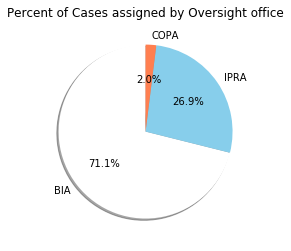

In [6]:
# Sorting complaints by investigating organization
complaint_assignments =copa_df['assignment'].value_counts()
assignment_labels = ['BIA','IPRA',"COPA"]
assignment_colors = ['White','skyblue','coral']
plt.title('Percent of Cases assigned by Oversight office')

plt.pie(complaint_assignments, labels = assignment_labels, colors = assignment_colors, shadow =True, startangle = 90, autopct='%.1f%%')

plt.savefig("Resources/Investigating organization Pie")

# What does this tell us?
Just over 71 percent of complaints made against CPD are handled internally by BIA. These cases are handled internally and as such generally stay out of public view. This is evident from the head of our data, where we see that every case assigned to BIA has no more than a complaint date and a log number.  While it is possible to get more information on these cases individually, it isn't feasible to do so on the scale which we are working at. While no abuse of power by those tasked with law enforcment should be considered minor the cases that fall under BIA jurisdiction tend to be less severe than those assigned to IPRA and COPA.
The significant gap in cases assigned to COPA and IPRA can be explained by COPA's relative youth.  While both organizations operated at the same time for a short period COPA has since replaced IPRA completely. An increase in scrutiny of police abuses of power came following the release of a dashcam footage of the shooting of LaQuan McDonald in 2014. IPRA came under fire not just specifically for thatcase but for failing to keep police accountable and was later replaced by COPA.

In [7]:
# Remove BIA complaints from the set, to analyze IPRA and COPA
copa_df = copa_df[copa_df.assignment != 'BIA']

In [8]:
complaint_assignments_lessBIA =copa_df['assignment'].value_counts()
complaint_assignments_lessBIA

IPRA    21953
COPA     1603
Name: assignment, dtype: int64

# What offenses are most frequently the subject to complaints?
The remainder of the analysis will only look at cases handled by COPA and IPRA. Unfortunately the public information given by BIA is incredibly limited and gives very little useful data to analyze.

I expect that a majority of the complaints that are made will be regarding more violent offenses.  T
    

In [9]:
copa_df['current_category'].value_counts()

Excessive Force                  8487
Taser Notification               4711
Miscellaneous                    3021
Verbal Abuse                     1463
Unnecessary Display of Weapon    1016
Firearm Discharge at Animal       731
Civil Suits                       680
Domestic Violence                 637
Search or Seizure                 563
Firearm Discharge - Hits          460
Death or Injury In Custody        424
OC Discharge                      413
Firearm Discharge - No Hits       385
Coercion                          169
Operational Violation             135
Taser Discharge                    96
Motor Vehicle Related Death        45
Legal Violation                    21
Bias                               17
Unlawful Denial of Counsel         10
Name: current_category, dtype: int64

In [10]:
excessive_force = len(copa_df[copa_df["current_category"] == "Excessive Force"])
taser_notification = len(copa_df[copa_df["current_category"] == "Taser Notification"])
miscellaneous = len(copa_df[copa_df["current_category"] == "Miscellaneous"])
verbal_abuse = len(copa_df[copa_df["current_category"] == "Verbal Abuse"])
unnecessary_display_of_weapon = len(copa_df[copa_df["current_category"] == "Unnecessary Display of Weapon"])
firearm_discharge_at_animal = len(copa_df[copa_df["current_category"] == "Firearm Discharge at Animal"])
civil_suits = len(copa_df[copa_df["current_category"] == "Civil Suits"])
domestic_violence = len(copa_df[copa_df["current_category"] == "Domestic Violence"])
search_or_seizure = len(copa_df[copa_df["current_category"] == "Search or Seizure"])
firearm_discharge_hits = len(copa_df[copa_df["current_category"] == "Firearm Discharge - Hits"])
death_or_injury_in_custody = len(copa_df[copa_df["current_category"] == "Death or Injury In Custody"])
oc_discharge = len(copa_df[copa_df["current_category"] == "OC Discharge"])
firearm_discharge_no_hits = len(copa_df[copa_df["current_category"] == "Firearm Discharge - No Hits"])
coercion = len(copa_df[copa_df["current_category"] == "Coercion"])
operational_violation = len(copa_df[copa_df["current_category"] == "Operational Violation"])
taser_discharge = len(copa_df[copa_df["current_category"] == "Taser Discharge"])
motor_vehicle_death = len(copa_df[copa_df["current_category"] == "Motor Vehicle Related Death"])
legal_violation = len(copa_df[copa_df["current_category"] == "Legal Violation"])
bias = len(copa_df[copa_df["current_category"] == "Bias"])
unlawful_denial_of_counsel = len(copa_df[copa_df["current_category"] == "Unlawful Denial of Counsel"])

In [29]:
# All complaints by category
complaint_df=({'Excessive Force': excessive_force,
              'Taser Notification': taser_notification,
              'Miscellaneous':miscellaneous,
              'Verbal Abuse':verbal_abuse,
              'Unnecessary Display of Weapon':unnecessary_display_of_weapon,
              'Firearm Discharge at Animal':firearm_discharge_at_animal,
              'Civil Suit': civil_suits,
              'Domestic Violence': domestic_violence,
              'Search or Seizure': search_or_seizure,
              'Firearm Discharge -- Hits':firearm_discharge_hits,
              'Death or Injusry in Custody':death_or_injury_in_custody,
              'OC Discharge(Chemical Agent)': oc_discharge,
              'Firearm Dischagre -- No Hits': firearm_discharge_no_hits,
              'Coercion': coercion,
              'Operational Violation': operational_violation,
              'Taser Discharge': taser_discharge,
              'Motor Vehicle Death': motor_vehicle_death,
              'Legal Violation': legal_violation,
              'Bias': bias,
              'Unlawful Denial of counsel':unlawful_denial_of_counsel})
complaint_df = pd.DataFrame(complaint_df, index=[0])
complaint_df=complaint_df.rename(columns ={0: "Complaint Count"}) 
complaint_df=complaint_df.transpose()
complaint_df

,0
Excessive Force,8487
Taser Notification,4711
Miscellaneous,3021
Verbal Abuse,1463
Unnecessary Display of Weapon,1016
Firearm Discharge at Animal,731
Civil Suit,680
Domestic Violence,637
Search or Seizure,563
Firearm Discharge -- Hits,460


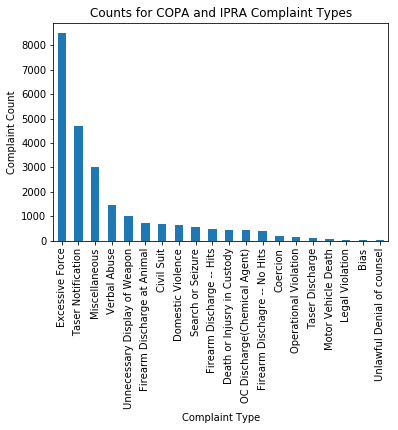

In [13]:
# Complaint counts Bar Graph
complaint_bar = complaint_df.iloc[0].plot.bar()
plt.xlabel('Complaint Type')
plt.ylabel('Complaint Count')
plt.title('Counts for COPA and IPRA Complaint Types')

plt.savefig("Resources/Complaint types Bar")

In [15]:
#violent complaints
violent_complaint_df=({'Excessive Force': excessive_force,
              'Taser Notification': taser_notification,
              'Firearm Discharge at Animal':firearm_discharge_at_animal,
              'Domestic Violence': domestic_violence,
              'Firearm Discharge -- Hits':firearm_discharge_hits,
              'Death or Injusry in Custody':death_or_injury_in_custody,
              'OC Discharge(Chemical Agent)': oc_discharge,
              'Firearm Dischagre -- No Hits': firearm_discharge_no_hits,
              'Taser Discharge': taser_discharge,
              'Motor Vehicle Death': motor_vehicle_death})
violent_complaint_df = pd.DataFrame(violent_complaint_df, index=[0])
violent_complaint_df.transpose()

,0
Excessive Force,8487
Taser Notification,4711
Firearm Discharge at Animal,731
Domestic Violence,637
Firearm Discharge -- Hits,460
Death or Injusry in Custody,424
OC Discharge(Chemical Agent),413
Firearm Dischagre -- No Hits,385
Taser Discharge,96
Motor Vehicle Death,45


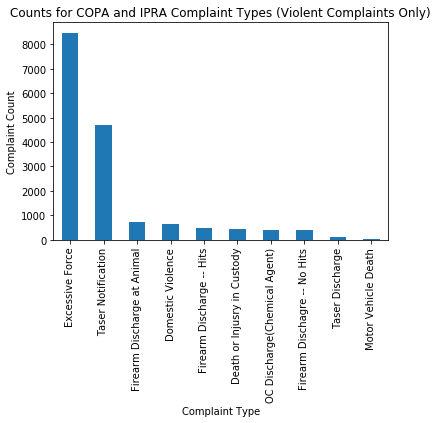

In [17]:
# Bar graph for violent complaints
Violent_complaint_bar = violent_complaint_df.iloc[0].plot.bar()
plt.xlabel('Complaint Type')
plt.ylabel('Complaint Count')
plt.title('Counts for COPA and IPRA Complaint Types (Violent Complaints Only)')

plt.savefig("Resources/Violent complaint types Bar")

# Are Violent cases more likely to be reported?
We can't determine whether or not violent cases are more likely to be reported, because we obviously don't have any information on cases that aren't reported. However, we can observe that of the complaints those whose category is inherently violent make up 69.5% of all complaints handled by COPA and IPRA. This also discounts every complaints like miscellaneous and coercion, which while not inherently violent certainly could be.

While we can't ultimately determine if violent cases are more likely to be reported we can determine that case reported are more likely than not violent.

# What are the outcomes of these investigation?
## Investigation findings are divided into one of six categories in the dataset

No Finding: The investigation is either waiting to begin, still underway or has been closed
No Affidavit: According to COPA's website state law stipulates that "in most instances, an affidavit be signed where an allegation of misconduct is made against a police officer." In certain cases Copa will pursue an affadavit override to pursue the case but if they cannot aquire an affadavit or and override the case will be closed.
Not Sustained: The allegation is not supported by sufficient evidence which could be used to prove or disprove the allegation.
Sustained: The allegation was supported by sufficient evidence to justify disciplinary action. Recommendations of disciplinary action may range from violation noted to separation from the Department.
Unfounded: The complaint was not based on facts as shown by the investigation, or the reported incident did not occur.
 Exonerated: The incident occurred, but the action taken by the officer(s) was deemed lawful and proper.

In [30]:
investigation_finding=copa_df['finding_code'].value_counts()
investigation_finding

No Finding       8202
NO AFFIDAVIT     5925
NOT SUSTAINED    4767
UNFOUNDED        2349
SUSTAINED        1002
EXONERATED        123
Name: finding_code, dtype: int64

In [31]:
no_finding = len(copa_df[copa_df["finding_code"] == "No Finding"])
no_affadavit = len(copa_df[copa_df["finding_code"] == "NO AFFIDAVIT"])
not_sustained = len(copa_df[copa_df["finding_code"] == "NOT SUSTAINED"])
unfounded = len(copa_df[copa_df["finding_code"] == "UNFOUNDED"])
sustained = len(copa_df[copa_df["finding_code"] == "SUSTAINED"])
exonerated = len(copa_df[copa_df["finding_code"] == "EXONERATED"])

In [32]:
finding_df = ({'No Finding': no_finding,
              'No Affadavit': no_affadavit,
              'Not Sustained': not_sustained,
              'Unfounded': unfounded,
              'Sustained':sustained,
              'Exonerated': exonerated
              })
finding_df = pd.DataFrame(finding_df, index=[0])
finding_df.transpose()

,0
No Finding,8202
No Affadavit,5925
Not Sustained,4767
Unfounded,2349
Sustained,1002
Exonerated,123


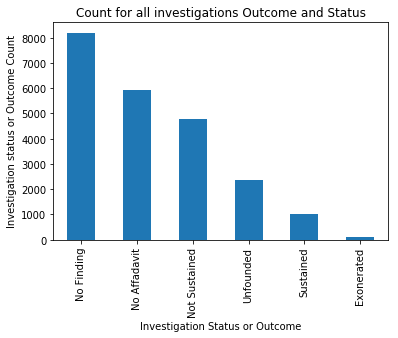

In [34]:
# Finding DF
investigation_status = finding_df.iloc[0].plot.bar()
plt.xlabel('Investigation Status or Outcome')
plt.ylabel('Investigation status or Outcome Count')
plt.title('Count for all investigations Outcome and Status')

plt.savefig("Resources/All Investigation Findings Bar")

# Are cases handled by COPA more likely to be sustained than those handled by IPRA?
Since COPA was formed due to the failure of IPRA to maintain accountabilty, I would expect that cases handled by COPA would be more likely to result in some sort of discipline than those handled by IPRA.

In [35]:
# New DF containing only IPRA cases
ipra_df = copa_df[copa_df.assignment == 'IPRA']
ipra_df.head()

,age_of_complainants,age_of_involved_officers,assignment,beat,case_type,complaint_date,complaint_day,complaint_hour,complaint_month,current_category,current_status,finding_code,log_no,police_shooting,race_of_complainants,race_of_involved_officers,sex_of_complainants,sex_of_involved_officers,years_on_force_of_officers
5437,40-49 | 20-29 | 0-19 | 40-49,20-29 | 30-39,IPRA,2232,Complaint,2017-09-14T21:56:23.000,5,21,9,Excessive Force,Closed,NO AFFIDAVIT,1086749,No,African American / Black | African American / ...,White | White,Female | Male | Female | Male,Female | Male,0-4 | 10-14
5439,NaN,30-39,IPRA,431,Notification,2017-09-14T17:37:14.000,5,17,9,Firearm Discharge at Animal,Closed,No Finding,1086747,No,NaN,African American / Black,NaN,Male,10-14
5440,50-59,50-59,IPRA,522,Complaint,2017-09-14T16:35:00.000,5,16,9,Verbal Abuse,Pending Investigation,NaN,1086746,No,African American / Black,African American / Black,Male,Female,25-29
5441,20-29,40-49 | 30-39 | 40-49,IPRA,1532,Complaint,2017-09-14T16:24:41.000,5,16,9,Search or Seizure,Pending Investigation,NaN,1086745,No,African American / Black,White | White | Hispanic,Male,Male | Male | Male,15-19 | 10-14 | 15-19
5446,20-29,NaN,IPRA,1533,Complaint,2017-09-14T13:05:42.000,5,13,9,Verbal Abuse,Pending Investigation,NaN,1086740,No,African American / Black,NaN,Male,NaN,NaN


In [36]:
# IPRA investigation findings
ipra_investigation_finding=ipra_df['finding_code'].value_counts()
ipra_investigation_finding

No Finding       7919
NO AFFIDAVIT     5672
NOT SUSTAINED    4732
UNFOUNDED        2247
SUSTAINED         950
EXONERATED         99
Name: finding_code, dtype: int64

In [37]:
ipra_no_finding = len(ipra_df[ipra_df["finding_code"] == "No Finding"])
ipra_no_affadavit = len(ipra_df[ipra_df["finding_code"] == "NO AFFIDAVIT"])
ipra_not_sustained = len(ipra_df[ipra_df["finding_code"] == "NOT SUSTAINED"])
ipra_unfounded = len(ipra_df[ipra_df["finding_code"] == "UNFOUNDED"])
ipra_sustained = len(ipra_df[ipra_df["finding_code"] == "SUSTAINED"])
ipra_exonerated = len(ipra_df[ipra_df["finding_code"] == "EXONERATED"])

In [38]:
ipra_finding_df = ({'No Finding': ipra_no_finding,
              'No Affadavit': ipra_no_affadavit,
              'Not Sustained': ipra_not_sustained,
              'Unfounded': ipra_unfounded,
              'Sustained':ipra_sustained,
              'Exonerated': ipra_exonerated
              })
ipra_finding_df = pd.DataFrame(ipra_finding_df, index=[0])
ipra_finding_df.transpose()

,0
No Finding,7919
No Affadavit,5672
Not Sustained,4732
Unfounded,2247
Sustained,950
Exonerated,99


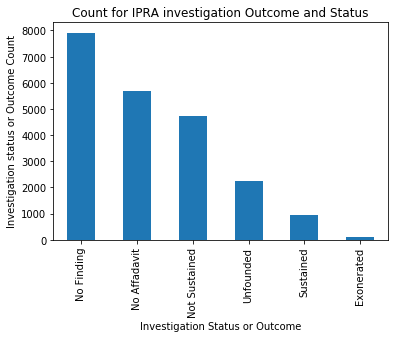

In [39]:
# IPRA finding DF
ipra_investigation_status = ipra_finding_df.iloc[0].plot.bar()
plt.xlabel('Investigation Status or Outcome')
plt.ylabel('Investigation status or Outcome Count')
plt.title('Count for IPRA investigation Outcome and Status')

plt.savefig("Resources/IPRA Investigation Findings Bar")

# Sustained, cases in which some officer discipline occured make up just 4.3% of cases handled by IPRA

In [40]:
# New DF containing only COPA cases
copa_only_df = copa_df[copa_df.assignment == 'COPA']
copa_only_df.head()

,age_of_complainants,age_of_involved_officers,assignment,beat,case_type,complaint_date,complaint_day,complaint_hour,complaint_month,current_category,current_status,finding_code,log_no,police_shooting,race_of_complainants,race_of_involved_officers,sex_of_complainants,sex_of_involved_officers,years_on_force_of_officers
4,40-49 | 20-29,NaN,COPA,1132,Complaint,2019-01-11T15:18:16.000,6,15,1,Excessive Force,Pending Investigation,NaN,1092325,No,African American / Black | African American / ...,NaN,Female | Male,NaN,NaN
16,20-29,NaN,COPA,1114,Complaint,2019-01-11T00:50:55.000,6,0,1,Excessive Force,Pending Investigation,NaN,1092312,No,African American / Black,NaN,Male,NaN,NaN
22,20-29,NaN,COPA,411,Complaint,2019-01-10T14:09:40.000,5,14,1,Operational Violation,Pending Investigation,NaN,1092306,No,African American / Black,NaN,Male,NaN,NaN
23,Unknown,30-39,COPA,1933,Complaint,2019-01-10T13:55:51.000,5,13,1,Unlawful Denial of Counsel,Pending Investigation,NaN,1092305,No,Hispanic,Asian or Pacific Islander,Male,Male,10-14
24,Unknown,30-39 | 20-29 | 30-39 | 50-59 | 50-59 | 40-49,COPA,835,Complaint,2019-01-10T13:24:46.000,5,13,1,Civil Suits,Pending Investigation,NaN,1092304,No,Unknown,Asian or Pacific Islander | White | Asian or P...,Male,Male | Female | Male | Male | Male | Male,5-9 | 0-4 | 10-14 | 15-19 | 20-24 | 25-29


In [41]:
#COPA investigation findings
copa_investigation_finding=copa_only_df['finding_code'].value_counts()
copa_investigation_finding

No Finding       283
NO AFFIDAVIT     253
UNFOUNDED        102
SUSTAINED         52
NOT SUSTAINED     35
EXONERATED        24
Name: finding_code, dtype: int64

In [42]:
# Counts for investigation findings
copa_no_finding = len(copa_only_df[copa_only_df["finding_code"] == "No Finding"])
copa_no_affadavit = len(copa_only_df[copa_only_df["finding_code"] == "NO AFFIDAVIT"])
copa_not_sustained = len(copa_only_df[copa_only_df["finding_code"] == "NOT SUSTAINED"])
copa_unfounded = len(copa_only_df[copa_only_df["finding_code"] == "UNFOUNDED"])
copa_sustained = len(copa_only_df[copa_only_df["finding_code"] == "SUSTAINED"])
copa_exonerated = len(copa_only_df[copa_only_df["finding_code"] == "EXONERATED"])

In [43]:
copa_finding_df = ({'No Finding': copa_no_finding,
              'No Affadavit': copa_no_affadavit,
              'Not Sustained': copa_not_sustained,
              'Unfounded': copa_unfounded,
              'Sustained':copa_sustained,
              'Exonerated': copa_exonerated
              })
copa_finding_df = pd.DataFrame(copa_finding_df, index=[0])
copa_finding_df.transpose()

,0
No Finding,283
No Affadavit,253
Not Sustained,35
Unfounded,102
Sustained,52
Exonerated,24


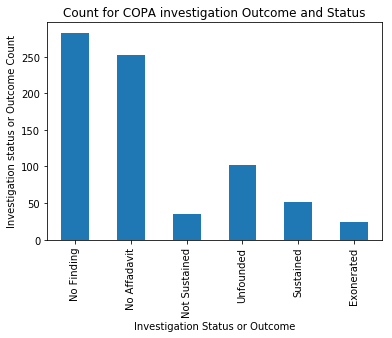

In [44]:
# COPA finding DF
count_labels=['283','253','35','102','52','24']
copa_investigation_status = copa_finding_df.iloc[0].plot.bar(tick_label= count_labels)
plt.xlabel('Investigation Status or Outcome')
plt.ylabel('Investigation status or Outcome Count')
plt.title('Count for COPA investigation Outcome and Status')


plt.savefig("Resources/COPA Investigation Findings Bar")


IPRA, largely considered to be failing it mandate to investigate complaints to ensure police accountability found that only 4.3% of complaints resulted in a sustained verdit, meaning the officer was found to be acting outside of their powers, resulting in discipline of some manor.
COPA the successor to IPRA after its failure has reached sustained verdicts in 6.9% of its cases.  It is important to note that the sample sizes vary due to COPA's relative youth, with COPA cases making up only about 6.8% of cases given to one of the two independent review organiztions. In addition the cases are obviously different and as such are hard to compare exactly.
With those limitations accounted for, COPA is a more effective organiztion when measuring the prectentage of cases sustained.